<a href="https://colab.research.google.com/github/ErikGumilar/Olist-Marketing-Channel-Attribution/blob/main/Marketing_Attribution_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package & Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from marketing_attribution_models import MAM

%matplotlib inline

In [ ]:
# read dataset
# marketing funnel
olist_marketing_qualified_leads = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_marketing_qualified_leads_dataset.csv")
olist_closed_deals = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_closed_deals_dataset.csv")

# marketing order|
olist_order_items = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv")
olist_seller = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv")

# Combining Dataset

## Order Items & Seller

In [ ]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
olist_seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# unique check on seller_id variabel
olist_order_items['seller_id'].nunique()

3095

In [ ]:
# create specific dataframe by grouping of seller id
data_seller_agg = olist_order_items.groupby('seller_id', as_index=False).agg({
    'order_id': 'nunique',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
})

In [ ]:
# renaming daa_seller_agg dataframe
data_seller_agg = data_seller_agg.rename(columns={
    'order_id': "total_trx",
    'product_id': "total_ordered"
})

In [ ]:
# check data_seller_agg
data_seller_agg.head(10)

,seller_id,total_trx,total_ordered,price,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,1,2685.00,63.06
1,001cca7ae9ae17fb1caed9dfb1094831,200,11,25080.03,8854.14
2,001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94
3,002100f778ceb8431b7a1020ff7ab48f,51,24,1234.50,793.66
4,003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38
5,004c9cd9d87a3c30c522c48c4fc07416,158,88,19712.71,3551.23
6,00720abe85ba0859807595bbf045a33b,13,9,1007.50,315.98
7,00ab3eff1b5192e5f1a63bcecfee11c8,1,1,98.00,12.08
8,00d8b143d12632bad99c0ad66ad52825,1,1,86.00,51.10
9,00ee68308b45bc5e2660cd833c3f81cc,135,23,20260.00,3180.66


In [ ]:
# combining the order items and order dataset by joining on order id
cols= [
    'seller_id',
    'seller_city',
    'seller_state',
    'total_trx',
    'total_ordered',
    'price',
    'freight_value'
]

data_seller = pd.merge(
    left= data_seller_agg,
    right= olist_seller,
    on= 'seller_id',
    how= 'inner'
)[cols]

data_seller.head(5)

,seller_id,seller_city,seller_state,total_trx,total_ordered,price,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,3,1,2685.00,63.06
1,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,200,11,25080.03,8854.14
2,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,1,1,250.00,17.94
3,002100f778ceb8431b7a1020ff7ab48f,franca,SP,51,24,1234.50,793.66
4,003554e2dce176b5555353e4f3555ac8,goiania,GO,1,1,120.00,19.38


In [ ]:
# check data shape
data_seller.shape

(3095, 7)

## Marketing Channel Dataset

In [ ]:
olist_marketing_qualified_leads

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [ ]:
olist_closed_deals

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [ ]:
# check mql_id nunique
olist_marketing_qualified_leads['mql_id'].nunique()

8000

In [ ]:
# based on nunique mql we only combine those data by mql_id that th order already closed
cols= [
    'mql_id',
    'seller_id',
    'business_segment',
    'lead_type',
    'business_type',
    'first_contact_date',
    'landing_page_id',
    'declared_monthly_revenue',
    'origin'
]

data_marketing = pd.merge(
    left= olist_closed_deals,
    right= olist_marketing_qualified_leads,
    on= 'mql_id',
    how= 'left'
)[cols]

data_marketing.head(5)

,mql_id,seller_id,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown


In [ ]:
# check data shape
data_marketing.shape

(842, 9)

In [ ]:
# nunique of seller_id and mql_id
print(data_marketing['mql_id'].nunique(),'\n')
print(data_marketing['seller_id'].nunique())

842 

842


## Combining

In [ ]:
cols= [
    'mql_id',
    'seller_id',
    'seller_city',
    'seller_state',
    'business_segment',
    'lead_type',
    'business_type',
    'first_contact_date',
    'landing_page_id',
    'declared_monthly_revenue',
    'origin',
    'total_trx',
    'total_ordered',
    'price',
    'freight_value'
]

data = pd.merge(
    left= data_marketing,
    right= data_seller,
    on= 'seller_id',
    how= 'left'
)[cols]

data

,mql_id,seller_id,seller_city,seller_state,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin,total_trx,total_ordered,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,belo horizonte,MG,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search,3.0,3.0,858.00,72.17
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,NaN,NaN,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral,NaN,NaN,NaN,NaN
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,novo hamburgo,RS,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search,107.0,48.0,23065.02,2307.06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,NaN,NaN,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search,NaN,NaN,NaN,NaN
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,santos,SP,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown,15.0,10.0,573.50,242.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,NaN,NaN,home_decor,offline,reseller,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,0.0,organic_search,NaN,NaN,NaN,NaN
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,NaN,NaN,construction_tools_house_garden,online_big,reseller,2018-05-18,b76ef37428e6799c421989521c0e5077,200000.0,organic_search,NaN,NaN,NaN,NaN
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,NaN,NaN,computers,online_medium,reseller,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,0.0,paid_search,NaN,NaN,NaN,NaN
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,NaN,NaN,pet,online_beginner,reseller,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,0.0,social,NaN,NaN,NaN,NaN


# Data Description

In [ ]:
# data understanding and profilling
print("="*10,"Data Understanding & Profilling","="*10)
print("\n")

# data shape
print("There is", data.shape[0], "observation and", data.shape[1], "columns on dataset")
print("\n")

# Data Information 
print("Data Info:", data.info())
print("\n")

# Numerical and Categorical Column
num= data.select_dtypes('number').columns
cat = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[num].columns}')
print('\n')
print(f'Categorical Columns: {data[cat].columns}')
print('\n')

# Statistical Summary of The Data
print("Statistical Description of Data:", data.describe())
print('\n','\n')

========== Data Understanding & Profilling ==========


There is 842 observation and 15 columns on dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 841
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mql_id                    842 non-null    object 
 1   seller_id                 842 non-null    object 
 2   seller_city               380 non-null    object 
 3   seller_state              380 non-null    object 
 4   business_segment          841 non-null    object 
 5   lead_type                 836 non-null    object 
 6   business_type             832 non-null    object 
 7   first_contact_date        842 non-null    object 
 8   landing_page_id           842 non-null    object 
 9   declared_monthly_revenue  842 non-null    float64
 10  origin                    828 non-null    object 
 11  total_trx                 380 non-null    float64
 12  total_order

# Feature Engineering

## Data Inspection & Exploration

In [ ]:
# change Date column to Date-type
data['first_contact_date'] = pd.to_datetime(data['first_contact_date'])

In [ ]:
data

,mql_id,seller_id,seller_city,seller_state,business_segment,lead_type,business_type,first_contact_date,landing_page_id,declared_monthly_revenue,origin,total_trx,total_ordered,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,belo horizonte,MG,pet,online_medium,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,0.0,organic_search,3.0,3.0,858.00,72.17
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,NaN,NaN,car_accessories,industry,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,0.0,referral,NaN,NaN,NaN,NaN
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,novo hamburgo,RS,home_appliances,online_big,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,0.0,organic_search,107.0,48.0,23065.02,2307.06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,NaN,NaN,food_drink,online_small,reseller,2018-01-14,22c29808c4f815213303f8933030604c,0.0,paid_search,NaN,NaN,NaN,NaN
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,santos,SP,home_appliances,industry,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,0.0,unknown,15.0,10.0,573.50,242.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,NaN,NaN,home_decor,offline,reseller,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,0.0,organic_search,NaN,NaN,NaN,NaN
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,NaN,NaN,construction_tools_house_garden,online_big,reseller,2018-05-18,b76ef37428e6799c421989521c0e5077,200000.0,organic_search,NaN,NaN,NaN,NaN
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,NaN,NaN,computers,online_medium,reseller,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,0.0,paid_search,NaN,NaN,NaN,NaN
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,NaN,NaN,pet,online_beginner,reseller,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,0.0,social,NaN,NaN,NaN,NaN


In [ ]:
# calculate number of transfaction based on seller_id, landing_page_id, date, and origin
aggregated_data = data.groupby(['seller_id', 'first_contact_date', 'landing_page_id', 'origin'],as_index=False).agg(
    {
        'declared_monthly_revenue': 'sum',
        'total_trx': 'sum',
        'total_ordered': 'sum',
        'price': 'sum',
        'freight_value': 'sum'
    }
).sort_values(by=['declared_monthly_revenue'], ascending = False)

In [ ]:
# check dataset
aggregated_data.head(10)

,seller_id,first_contact_date,landing_page_id,origin,declared_monthly_revenue,total_trx,total_ordered,price,freight_value
347,6fcc97197c64771f3c18aea3aa9d3913,2018-05-22,22c29808c4f815213303f8933030604c,organic_search,50000000.0,0.0,0.0,0.0,0.0
494,9966324e28b7fa38165d2d3d12d53b7f,2018-03-24,fbc24da54d531c6204ae2d17b1090bb1,paid_search,8000000.0,0.0,0.0,0.0,0.0
639,c33e6d3ad32fd5bec1b0f2522f668213,2018-04-28,22c29808c4f815213303f8933030604c,organic_search,500000.0,0.0,0.0,0.0,0.0
64,157497483bb7876340ea4441c9bd1774,2017-09-18,22c29808c4f815213303f8933030604c,organic_search,300000.0,0.0,0.0,0.0,0.0
391,7c7d0dee362960b1d9b01fe7284e19ba,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,300000.0,0.0,0.0,0.0,0.0
37,0d7d5bca59d45d750fb7913b974e9d08,2018-01-11,b76ef37428e6799c421989521c0e5077,unknown,250000.0,0.0,0.0,0.0,0.0
450,8c6d188ef073e289887bc52bc37f3e61,2018-03-06,b6885f18d203a61176418c1fb3764815,paid_search,250000.0,0.0,0.0,0.0,0.0
166,366b6b05f39997f102dc5179de14d43c,2018-02-02,22c29808c4f815213303f8933030604c,paid_search,210000.0,0.0,0.0,0.0,0.0
223,4a82eab98441aeb64566e2776c1fb2b6,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search,200000.0,0.0,0.0,0.0,0.0
246,5181ea7b0d346ed14c5c07f0ff22b2b4,2018-02-18,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,180000.0,0.0,0.0,0.0,0.0


In [ ]:
# check landing_page_id nunique
aggregated_data.nunique()

seller_id                   828
first_contact_date          194
landing_page_id             126
origin                       10
declared_monthly_revenue     26
total_trx                    52
total_ordered                31
price                       360
freight_value               372
dtype: int64

In [ ]:
# aggregated data on origin and landing page
aggregated_data.groupby(['landing_page_id', 'origin'], as_index=False).size().sort_values(by=['size'], ascending = False)

,landing_page_id,origin,size
149,b76ef37428e6799c421989521c0e5077,unknown,134
36,22c29808c4f815213303f8933030604c,organic_search,112
78,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,50
164,ce1a65abd0973638f1c887a6efcfa82d,organic_search,34
121,88740e65d5d6b056e0cda098e1ea6313,social,30
...,...,...,...
83,4e24f6443807ad2eba56754b0dc91140,direct_traffic,1
84,4e82dd1f6d00626bda0723eef0a269a6,direct_traffic,1
85,50f87b85a731cec08d8380b08c573ed3,organic_search,1
86,54d5e01ab35155d4bd8cf723fc6f04a0,organic_search,1


## Missing and Duplicated Value

In [ ]:
data.isnull().sum()

mql_id                        0
seller_id                     0
seller_city                 462
seller_state                462
business_segment              1
lead_type                     6
business_type                10
first_contact_date            0
landing_page_id               0
declared_monthly_revenue      0
origin                       14
total_trx                   462
total_ordered               462
price                       462
freight_value               462
dtype: int64

In [ ]:
clean_data = data.dropna()

In [ ]:
clean_data.shape

(370, 15)

# Attribution Analysis

In [ ]:
aggregated_data.head(10)

,seller_id,first_contact_date,landing_page_id,origin,declared_monthly_revenue,total_trx,total_ordered,price,freight_value
347,6fcc97197c64771f3c18aea3aa9d3913,2018-05-22,22c29808c4f815213303f8933030604c,organic_search,50000000.0,0.0,0.0,0.0,0.0
494,9966324e28b7fa38165d2d3d12d53b7f,2018-03-24,fbc24da54d531c6204ae2d17b1090bb1,paid_search,8000000.0,0.0,0.0,0.0,0.0
639,c33e6d3ad32fd5bec1b0f2522f668213,2018-04-28,22c29808c4f815213303f8933030604c,organic_search,500000.0,0.0,0.0,0.0,0.0
64,157497483bb7876340ea4441c9bd1774,2017-09-18,22c29808c4f815213303f8933030604c,organic_search,300000.0,0.0,0.0,0.0,0.0
391,7c7d0dee362960b1d9b01fe7284e19ba,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,300000.0,0.0,0.0,0.0,0.0
37,0d7d5bca59d45d750fb7913b974e9d08,2018-01-11,b76ef37428e6799c421989521c0e5077,unknown,250000.0,0.0,0.0,0.0,0.0
450,8c6d188ef073e289887bc52bc37f3e61,2018-03-06,b6885f18d203a61176418c1fb3764815,paid_search,250000.0,0.0,0.0,0.0,0.0
166,366b6b05f39997f102dc5179de14d43c,2018-02-02,22c29808c4f815213303f8933030604c,paid_search,210000.0,0.0,0.0,0.0,0.0
223,4a82eab98441aeb64566e2776c1fb2b6,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search,200000.0,0.0,0.0,0.0,0.0
246,5181ea7b0d346ed14c5c07f0ff22b2b4,2018-02-18,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,180000.0,0.0,0.0,0.0,0.0


In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 347 to 827
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   seller_id                 828 non-null    object        
 1   first_contact_date        828 non-null    datetime64[ns]
 2   landing_page_id           828 non-null    object        
 3   origin                    828 non-null    object        
 4   declared_monthly_revenue  828 non-null    float64       
 5   total_trx                 828 non-null    float64       
 6   total_ordered             828 non-null    float64       
 7   price                     828 non-null    float64       
 8   freight_value             828 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 64.7+ KB


In [ ]:
# check shape
aggregated_data.shape

(828, 9)

In [ ]:
channel_attribute_value = aggregated_data.assign(
    n_events = 0
).groupby(
    ['landing_page_id', 'origin'], as_index=False
).agg({
    'n_events': 'size',
    'total_trx': 'sum',
    'total_ordered': 'sum',
    'price': 'sum',
    'freight_value': 'sum',
    'seller_id' : 'nunique'
}).rename(
    columns={"seller_id":"total_seller"}
).assign(
    revenue_per_conversion = lambda x: x['total_trx']/x['n_events']
).sort_values(by=['total_trx'], ascending=False).copy()

In [ ]:
# check channel attribution value
channel_attribute_value

,landing_page_id,origin,n_events,total_trx,total_ordered,price,freight_value,total_seller,revenue_per_conversion
149,b76ef37428e6799c421989521c0e5077,unknown,134,1150.0,362.0,201745.20,22406.99,134,8.582090
36,22c29808c4f815213303f8933030604c,organic_search,112,484.0,288.0,113394.23,11140.76,112,4.321429
38,22c29808c4f815213303f8933030604c,paid_search,20,373.0,130.0,46367.79,6358.98,20,18.650000
164,ce1a65abd0973638f1c887a6efcfa82d,organic_search,34,230.0,131.0,17447.60,4457.45,34,6.764706
78,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,50,230.0,132.0,32299.73,5576.82,50,4.600000
...,...,...,...,...,...,...,...,...,...
76,40dec9f3d5259a3d2dbcdab2114fae47,direct_traffic,1,0.0,0.0,0.00,0.00,1,0.000000
72,3c5cc1a2e1d86abfce2a16a1bcc80e26,organic_search,1,0.0,0.0,0.00,0.00,1,0.000000
70,37cf94070e940a694969304de58debe1,unknown,1,0.0,0.0,0.00,0.00,1,0.000000
67,36120633c8737035fbabf079082f4ec1,organic_search,1,0.0,0.0,0.00,0.00,1,0.000000


In [ ]:
# create channel source
channel_attribute_value['channel_source'] = channel_attribute_value['origin'].str.cat(channel_attribute_value[['landing_page_id']], sep='-')

<Figure size 72000x3600 with 0 Axes>

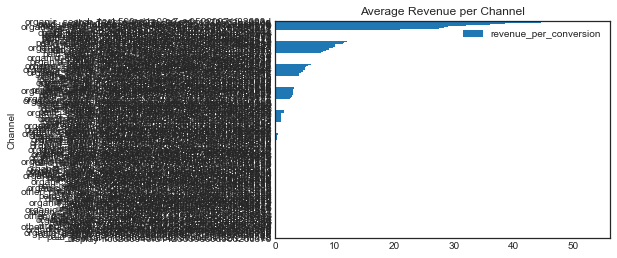

In [ ]:
# visualization
plt.figure(figsize=(1000,50))
channel_attribute_value[['channel_source', 'revenue_per_conversion']].sort_values(
  by = ['revenue_per_conversion'],
  ascending = True 
).plot(
    x = 'channel_source', 
    y = 'revenue_per_conversion', 
    kind = 'barh',
    title = 'Average Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Revenue per Conversion'
)
plt.show()

it's such a mess visualization. Of course it is not our false since the landing page data is in the link form. Because of that, let's jump right in to the Model

# Channel Attribution Model

## Heuristic Model

In [ ]:
data.columns

Index(['mql_id', 'seller_id', 'seller_city', 'seller_state',
       'business_segment', 'lead_type', 'business_type', 'first_contact_date',
       'landing_page_id', 'declared_monthly_revenue', 'origin', 'total_trx',
       'total_ordered', 'price', 'freight_value'],
      dtype='object')

In [ ]:
# data preprocessing
data['total_trx'].fillna(0, inplace=True)
data['freight_value'].fillna(0, inplace=True)
data['has_transaction'] = data.total_trx.apply(lambda x: True if x > 0 else False)

In [ ]:
# define data for model
data_for_model = data[['seller_id', 'origin', 'first_contact_date', 'total_trx', 'freight_value', 'has_transaction']]

In [ ]:
data_for_model

,seller_id,origin,first_contact_date,total_trx,freight_value,has_transaction
0,2c43fb513632d29b3b58df74816f1b06,organic_search,2018-02-21,3.0,72.17,True
1,bbb7d7893a450660432ea6652310ebb7,referral,2018-04-04,0.0,0.00,False
2,612170e34b97004b3ba37eae81836b4c,organic_search,2018-04-03,107.0,2307.06,True
3,21e1781e36faf92725dde4730a88ca0f,paid_search,2018-01-14,0.0,0.00,False
4,ed8cb7b190ceb6067227478e48cf8dde,unknown,2017-10-09,15.0,242.71,True
...,...,...,...,...,...,...
837,bfcc27719640628da877db48b672b169,organic_search,2018-03-28,0.0,0.00,False
838,4a82eab98441aeb64566e2776c1fb2b6,organic_search,2018-05-18,0.0,0.00,False
839,55031883943971ca22db6894574cfe2c,paid_search,2018-05-25,0.0,0.00,False
840,c0e933c238e41f0cd459d6025ee9b364,social,2018-02-04,0.0,0.00,False


In [ ]:
# data for model
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 841
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   seller_id           842 non-null    object        
 1   origin              828 non-null    object        
 2   first_contact_date  842 non-null    datetime64[ns]
 3   total_trx           842 non-null    float64       
 4   freight_value       842 non-null    float64       
 5   has_transaction     842 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 40.3+ KB


In [ ]:
# check null
data_for_model.isnull().sum()

seller_id              0
origin                14
first_contact_date     0
total_trx              0
freight_value          0
has_transaction        0
dtype: int64

In [ ]:
# drop the null
data_for_model = data_for_model.dropna()

In [ ]:
attribution = MAM(
    data_for_model, 
    channels_colname='origin',
    group_channels=True, 
    group_channels_by_id_list=['seller_id'], 
    group_timestamp_colname='first_contact_date',
    journey_with_conv_colname='has_transaction',
    create_journey_id_based_on_conversion = True,
    conversion_value='freight_value'
)

### Last Click Attribution

In [ ]:
attribution.attribution_last_click()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
 channels
 direct_traffic        5645.90
 display                284.95
 email                  637.42
 organic_search       28933.13
 other                 1877.98
 other_publicities        0.00
 paid_search          26723.01
 referral              1800.69
 social                7885.48
 unknown              25020.70
 Name: value, dtype: float64)

### First Click Attribution

In [ ]:
attribution.attribution_first_click()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
             channels  attribution_first_click_heuristic
 0     direct_traffic                            5645.90
 1            display                             284.95
 2              email                             637.42
 3     organic_search                           28933.13
 4              other                            1877.98
 5  other_publicities                               0.00
 6        paid_search                           26723.01
 7           referral                            1800.69
 8             social                            7885.48
 9            unknown                           25020.70)

### Linear Attribution

In [ ]:
attribution.attribution_linear()

(0                     [0.0]
 1      [47.230000000000004]
 2                     [0.0]
 3       [575.3600000000001]
 4                     [0.0]
                ...         
 823                   [0.0]
 824                [130.16]
 825     [537.0800000000002]
 826    [206.52999999999997]
 827                [438.12]
 Length: 828, dtype: object,
             channels  attribution_linear_heuristic
 0     direct_traffic                       5645.90
 1            display                        284.95
 2              email                        637.42
 3     organic_search                      28933.13
 4              other                       1877.98
 5  other_publicities                          0.00
 6        paid_search                      26723.01
 7           referral                       1800.69
 8             social                       7885.48
 9            unknown                      25020.70)

### Attribution Plot

<AxesSubplot:xlabel='channels', ylabel='value'>

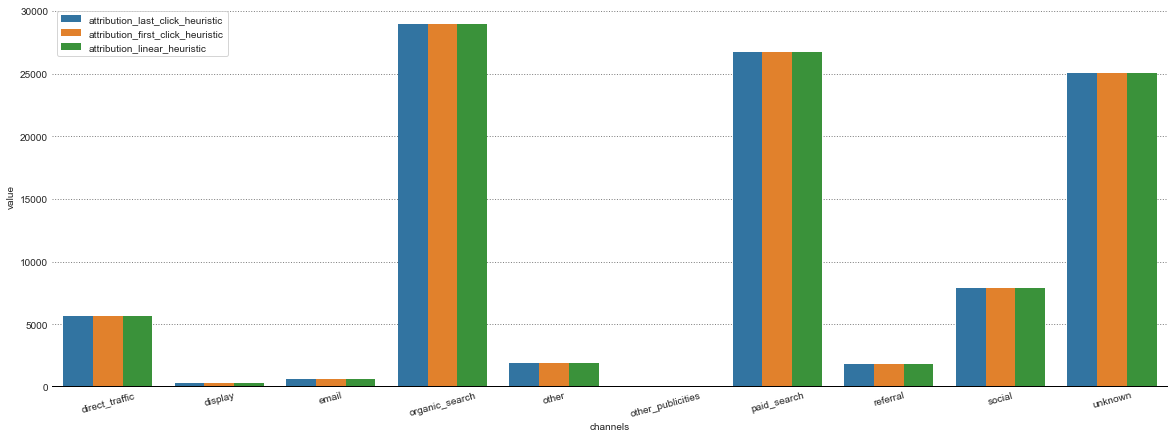

In [ ]:
attribution.plot(model_type='heuristic')

**Interpretation:**

Based on the plot of attribution, `Organic Search` has the largest impact on the marketing channel, following by `Paid Search` and `Unknown Channel`. Since we didn't the unknown channel, we assume it as `Seller Self Marketing`.

It is mean, seller has their own way to sales the product.

##  Markov Model

In [ ]:
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

In [ ]:
# check markov results
markov_results[1]

,channels,attribution_markov_algorithmic
0,paid_search,26723.01
1,direct_traffic,5645.90
2,other,1877.98
3,referral,1800.69
4,other_publicities,0.00
5,social,7885.48
6,organic_search,28933.13
7,unknown,25020.70
8,display,284.95
9,email,637.42


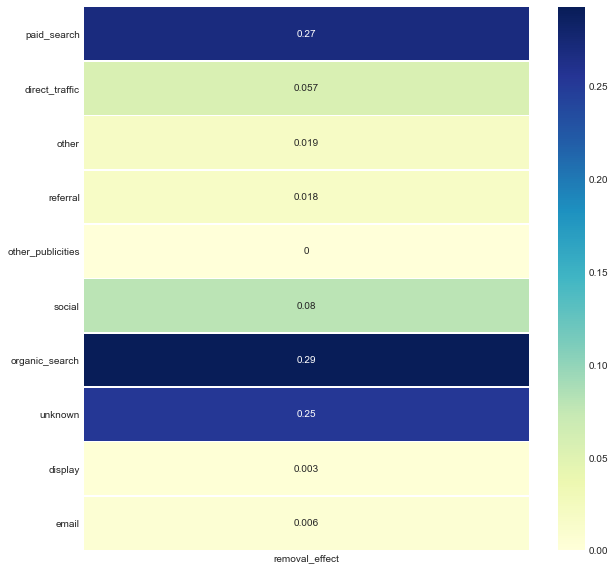

In [ ]:
# check removal effects
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

**Interpretation:**

This visualization goes the same way as the plot of attribution. The largest effect of losses is when we delete the `Organic Search` and `Paid Search` marketing channel. But if we delete the `Other Publicities` channel, we may couldn't find the percentage of losses but we need to identified those publicity. It is maybe the SEO.

## Final Attribution

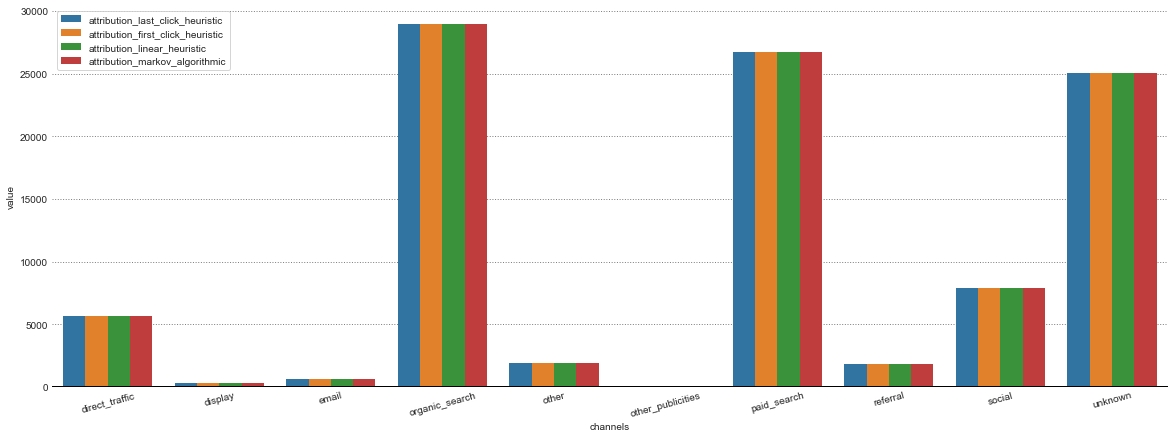

In [ ]:
attribution.plot();

**Interpretation:**

It is the same results from the first Attribution Plot. We didn't get different between these two.

# Converted Seller Analysis

In [ ]:
olist_closed_deals

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [ ]:
olist_marketing_qualified_leads

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [ ]:
# create new columns named as deals
data_for_seller = olist_marketing_qualified_leads
data_for_seller['deals'] = olist_marketing_qualified_leads['mql_id'].isin(olist_closed_deals['mql_id'])

In [ ]:
data_for_seller

,mql_id,first_contact_date,landing_page_id,origin,deals
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,False
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,False
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,False
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,False
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,True
...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,False
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,False
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,False
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,False


In [ ]:
# change deals type as int
data_for_seller['deals'] = data_for_seller['deals'].astype(int)

In [ ]:
data_for_seller

,mql_id,first_contact_date,landing_page_id,origin,deals
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1
...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,0
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,0
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,0
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,0


## Data Preprocessing

In [ ]:
# define a function calls calculation of prevalence
def calc_prevalence(y):
 return (sum(y)/len(y))

In [ ]:
calc_prevalence(data_for_seller.deals.values)

0.10525

Why do we need to create a prevalence function? The function is to see how big the percentage of the value of a variable in the 1 dataset is.

In this case, only **1 in 10 sellers** closed the order.

In [ ]:
data_for_seller['first_contact_date'].head(10)

0    2018-02-01
1    2017-10-20
2    2018-03-22
3    2018-01-22
4    2018-02-21
5    2018-01-14
6    2018-05-15
7    2018-05-24
8    2017-11-10
9    2017-12-25
Name: first_contact_date, dtype: object

In [ ]:
# change the first_contact_date into datetype
data_for_seller['first_contact_date'] = pd.to_datetime(data_for_seller['first_contact_date'])

In [ ]:
# check
data_for_seller['first_contact_date'].head(10)

0   2018-02-01
1   2017-10-20
2   2018-03-22
3   2018-01-22
4   2018-02-21
5   2018-01-14
6   2018-05-15
7   2018-05-24
8   2017-11-10
9   2017-12-25
Name: first_contact_date, dtype: datetime64[ns]

In [ ]:
# feature engineering on datetype columns
data_for_seller['first_contact_date_year'] = data_for_seller['first_contact_date'].dt.year
data_for_seller['first_contact_date_month'] = data_for_seller['first_contact_date'].dt.month
data_for_seller['first_contact_date_week'] = data_for_seller['first_contact_date'].dt.week
data_for_seller['first_contact_date_day'] = data_for_seller['first_contact_date'].dt.day

<ipython-input-176-4d2dbccfd211>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_for_seller['first_contact_date_week'] = data_for_seller['first_contact_date'].dt.week


In [ ]:
# check the data
data_for_seller

,mql_id,first_contact_date,landing_page_id,origin,deals,first_contact_date_year,first_contact_date_month,first_contact_date_week,first_contact_date_day
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0,2018,2,5,1
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0,2017,10,42,20
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0,2018,3,12,22
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0,2018,1,4,22
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1,2018,2,8,21
...,...,...,...,...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,0,2018,5,21,22
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,0,2018,3,13,27
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,0,2017,8,34,27
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,0,2017,10,40,6


In [ ]:
# count the value
print(data_for_seller.groupby('first_contact_date_year').size())
print(data_for_seller.groupby('first_contact_date_month').size())
print(data_for_seller.groupby('first_contact_date_week').size())
print(data_for_seller.groupby('first_contact_date_day').size())

first_contact_date_year
2017    2002
2018    5998
dtype: int64
first_contact_date_month
1     1141
2     1028
3     1174
4     1352
5     1303
6        4
7      239
8      386
9      312
10     416
11     445
12     200
dtype: int64
first_contact_date_week
1     216
2     257
3     247
4     268
5     271
6     264
7     220
8     270
9     261
10    261
11    298
12    279
13    250
14    338
15    298
16    328
17    316
18    303
19    288
20    304
21    311
22    150
24      3
25      1
26      1
27     42
28     51
29     67
30     59
31     87
32     83
33     91
34     85
35     77
36     69
37     90
38     69
39     74
40     90
41     61
42    105
43    117
44     90
45     96
46     99
47    126
48     88
49     26
50     33
51     43
52     79
dtype: int64
first_contact_date_day
1     215
2     298
3     229
4     247
5     268
6     272
7     288
8     264
9     254
10    265
11    204
12    254
13    220
14    276
15    296
16    300
17    239
18    232
19    268
20    2

**Simple Interpretation:**

Based on the value count, month of July very few even close to 0 people contacted to become a seller. The year 2017 contributed the most potential potential sellers.

In [ ]:
# prevalence calculation on every feature of first_contach_date
print(data_for_seller.groupby('first_contact_date_year').apply(lambda g: calc_prevalence(g.deals.values)))
print(data_for_seller.groupby('first_contact_date_month').apply(lambda g: calc_prevalence(g.deals.values)))
print(data_for_seller.groupby('first_contact_date_week').apply(lambda g: calc_prevalence(g.deals.values)))
print(data_for_seller.groupby('first_contact_date_day').apply(lambda g: calc_prevalence(g.deals.values)))

first_contact_date_year
2017    0.03047
2018    0.13021
dtype: float64
first_contact_date_month
1     0.133216
2     0.144942
3     0.142249
4     0.135355
5     0.099770
6     0.000000
7     0.008368
8     0.023316
9     0.022436
10    0.033654
11    0.040449
12    0.055000
dtype: float64
first_contact_date_week
1     0.115741
2     0.167315
3     0.109312
4     0.134328
5     0.151292
6     0.132576
7     0.177273
8     0.122222
9     0.157088
10    0.134100
11    0.127517
12    0.157706
13    0.128000
14    0.180473
15    0.134228
16    0.137195
17    0.098101
18    0.089109
19    0.142361
20    0.062500
21    0.106109
22    0.100000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.039216
29    0.000000
30    0.000000
31    0.011494
32    0.000000
33    0.043956
34    0.011765
35    0.051948
36    0.000000
37    0.011111
38    0.043478
39    0.027027
40    0.011111
41    0.049180
42    0.066667
43    0.025641
44    0.011111
45    0.062500
46    0.040404
47    0.03

**Simple Interpretation:**

Based on the calculation of the prevalence, it was found that:
    
    1. The year 2018 had the most contributions from sellers who made sales deals
    2. In February and March, as many as 1 in 10 sellers managed to make a sale and decided to become a seller.

In [ ]:
from sklearn.model_selection import train_test_split

# split train and test
X = data_for_seller.drop(['deals','landing_page_id','first_contact_date'], axis = 1)
y = data_for_seller['deals']
ids = X['mql_id']
X.drop(['mql_id'], axis=1, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# check shape and info
print(X_train.shape)
print(X_train.info())

(6000, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6529 to 4959
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin                    5961 non-null   object
 1   first_contact_date_year   6000 non-null   int64 
 2   first_contact_date_month  6000 non-null   int64 
 3   first_contact_date_week   6000 non-null   int64 
 4   first_contact_date_day    6000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 281.2+ KB
None


In [ ]:
# check shape and info on test data
print(X_test.shape)
print(X_test.info())

(2000, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7289 to 5271
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin                    1979 non-null   object
 1   first_contact_date_year   2000 non-null   int64 
 2   first_contact_date_month  2000 non-null   int64 
 3   first_contact_date_week   2000 non-null   int64 
 4   first_contact_date_day    2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 93.8+ KB
None


In [ ]:
# missing value handling

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [ ]:
# check the imputed
print(imputed_X_train.info())
print(imputed_X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin                    6000 non-null   object
 1   first_contact_date_year   6000 non-null   object
 2   first_contact_date_month  6000 non-null   object
 3   first_contact_date_week   6000 non-null   object
 4   first_contact_date_day    6000 non-null   object
dtypes: object(5)
memory usage: 234.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin                    2000 non-null   object
 1   first_contact_date_year   2000 non-null   object
 2   first_contact_date_month  2000 non-null   object
 3   first_contact_date_week   2000 non-null   object
 4   first_contact_date_day    2000 non

In [ ]:
# change to int
imputed_X_train['first_contact_date_year'] = imputed_X_train['first_contact_date_year'].astype('int')
imputed_X_train['first_contact_date_month'] = imputed_X_train['first_contact_date_month'].astype('int')
imputed_X_train['first_contact_date_week'] = imputed_X_train['first_contact_date_week'].astype('int')
imputed_X_train['first_contact_date_day'] = imputed_X_train['first_contact_date_day'].astype('int')
imputed_X_test['first_contact_date_year'] = imputed_X_test['first_contact_date_year'].astype('int')
imputed_X_test['first_contact_date_month'] = imputed_X_test['first_contact_date_month'].astype('int')
imputed_X_test['first_contact_date_week'] = imputed_X_test['first_contact_date_week'].astype('int')
imputed_X_test['first_contact_date_day'] = imputed_X_test['first_contact_date_day'].astype('int')

In [ ]:
# one-hot encoding
imputed_X_train = pd.get_dummies(imputed_X_train, columns=['origin'])
imputed_X_test = pd.get_dummies(imputed_X_test, columns=['origin'])

In [ ]:
imputed_X_train

,first_contact_date_year,first_contact_date_month,first_contact_date_week,first_contact_date_day,origin_direct_traffic,origin_display,origin_email,origin_organic_search,origin_other,origin_other_publicities,origin_paid_search,origin_referral,origin_social,origin_unknown
0,2018,3,12,21,0,0,0,1,0,0,0,0,0,0
1,2018,4,16,16,0,0,0,0,0,0,0,1,0,0
2,2018,3,10,8,0,0,0,1,0,0,0,0,0,0
3,2018,1,4,22,0,0,0,0,0,0,1,0,0,0
4,2018,4,14,7,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2017,8,35,28,0,0,0,0,0,0,1,0,0,0
5996,2017,8,35,29,0,0,0,1,0,0,0,0,0,0
5997,2018,1,4,22,0,0,1,0,0,0,0,0,0,0
5998,2017,11,44,4,0,0,0,1,0,0,0,0,0,0


In [ ]:
imputed_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   first_contact_date_year   6000 non-null   int32
 1   first_contact_date_month  6000 non-null   int32
 2   first_contact_date_week   6000 non-null   int32
 3   first_contact_date_day    6000 non-null   int32
 4   origin_direct_traffic     6000 non-null   uint8
 5   origin_display            6000 non-null   uint8
 6   origin_email              6000 non-null   uint8
 7   origin_organic_search     6000 non-null   uint8
 8   origin_other              6000 non-null   uint8
 9   origin_other_publicities  6000 non-null   uint8
 10  origin_paid_search        6000 non-null   uint8
 11  origin_referral           6000 non-null   uint8
 12  origin_social             6000 non-null   uint8
 13  origin_unknown            6000 non-null   uint8
dtypes: int32(4), uint8(10)
memory usage: 152

In [ ]:
# check train data dimension
print('the size of train predictor are:',imputed_X_train.shape,'\n')

# check test data dimension
print('the size of test predictor are:',imputed_X_test.shape,'\n')

# check train target counts
print('the value count of target on train set is: ','\n',y_train.value_counts(),'\n')

# check test target counts
print('the value count of target on test set is:','\n',y_test.value_counts(),'\n')

the size of train predictor are: (6000, 14) 

the size of test predictor are: (2000, 14) 

the value count of target on train set is:  
 0    5365
1     635
Name: deals, dtype: int64 

the value count of target on test set is: 
 0    1793
1     207
Name: deals, dtype: int64 



Based on the target value counts, there is **imbalance** value on it. It must have to be done by **under sampling** it

In [ ]:
# oversampling features
from imblearn.over_sampling import SMOTE

# oversampling the train set
sm = SMOTE(random_state=1000, sampling_strategy=1.0)
imputed_X_train, y_train = sm.fit_resample(imputed_X_train, y_train)

In [ ]:
# recheck train data dimension
print('the size of train predictor are:',imputed_X_train.shape,'\n')

# recheck train target counts
print('the value count of target on train set is: ','\n',y_train.value_counts(),'\n')

the size of train predictor are: (10730, 14) 

the value count of target on train set is:  
 0    5365
1    5365
Name: deals, dtype: int64 



## Modeling

In [ ]:
import sklearn as sklearn

# import metrics method for model evaluation
import sklearn.metrics as metrics

# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

# import decision tree
from sklearn.tree import DecisionTreeClassifier

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, datasets


In [ ]:
# import grid search to hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialze the estimators
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

### Logistic Regression

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
lg_grid = dict(solver=solvers,penalty=penalty,C=c_values)
lg_grid_search = GridSearchCV(estimator=clf1, param_grid=lg_grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
lg_grid_result = lg_grid_search.fit(imputed_X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

In [ ]:
# summarize results
print("Best: %f using %s" % (lg_grid_result.best_score_, lg_grid_result.best_params_))
means = lg_grid_result.cv_results_['mean_test_score']
stds = lg_grid_result.cv_results_['std_test_score']
params = lg_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752006 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752006 (0.042927) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.705874 (0.032612) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.740356 (0.042149) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.751168 (0.047743) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.700001 (0.017597) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.740729 (0.042266) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.748930 (0.036688) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.705967 (0.024524) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.743524 (0.042069) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.746507 (0.032326) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.714447 (0.031594) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.739144 (0.039825) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.689191 (0.018750) wit

In [ ]:
# define new model for logistic regression
lg = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

In [ ]:
# fot the new model
lg = lg.fit(imputed_X_train, y_train)

# predict
y_pred_lg = lg.predict(imputed_X_test)
y_pred_proba_lg = lg.predict_proba(imputed_X_test)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_lg, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.919786       0.172619    0.7315     0.546203      0.842454
recall        0.767429       0.420290    0.7315     0.593859      0.731500
f1-score      0.836728       0.244726    0.7315     0.540727      0.775456
support    1793.000000     207.000000    0.7315  2000.000000   2000.000000 



C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

In [ ]:
# cross validation
scores = cross_val_score(lg, imputed_X_train, y_train, cv=5)
print(np.sqrt(scores))

C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.w

[0.80422927 0.8810948  0.88188775 0.88003643 0.88478914]


C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
# r2 score

from sklearn.metrics import r2_score

lin = r2_score(y_test, lg.predict(imputed_X_test))*100
print(lin,'%')

-189.37009465150302 %


Confusion Matrix on Logistic Regression Tuning:
 AxesSubplot(0.125,0.125;0.62x0.755)


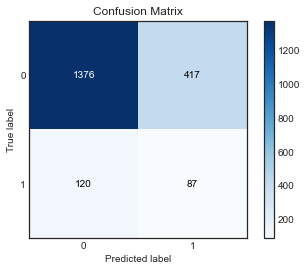

In [ ]:
# confusion metric
import scikitplot as skplt

lg_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_lg)
print('Confusion Matrix on Logistic Regression Tuning:\n',lg_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


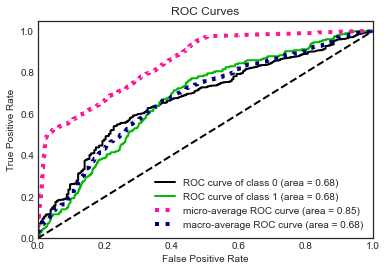

In [ ]:
# model performance check
lg_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_lg)
print(lg_ROC_AUC)

In [ ]:
# check model accuracy
lg_accuracy = metrics.accuracy_score(y_test, y_pred_lg)
print("The accuracy score for Logistic Regression  is:",lg_accuracy,'\n')

# check f1-score
lg_f1_score = metrics.f1_score(y_test,y_pred_lg)
print("The F1 score on Logistic Regression is:",lg_f1_score,'\n')

The accuracy score for Logistic Regression  is: 0.7315 

The F1 score on Logistic Regression is: 0.24472573839662448 



### K-Neighbors

In [ ]:
# param
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
knn_grid_search = GridSearchCV(estimator=clf2, param_grid=knn_grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
knn_grid_result = knn_grid_search.fit(imputed_X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))
means = knn_grid_result.cv_results_['mean_test_score']
stds = knn_grid_result.cv_results_['std_test_score']
params = knn_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800189 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.714169 (0.035793) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.714169 (0.035793) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.705967 (0.032863) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.722183 (0.033458) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.700281 (0.025538) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.734858 (0.031784) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.691987 (0.025978) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.742873 (0.032494) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.696832 (0.020985) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.764308 (0.031427) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.690494

In [ ]:
# define new model for K-Nearest Neighbors
knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 19, weights= 'distance')
knn = knn.fit(imputed_X_train, y_train)

In [ ]:
# predict
y_pred_knn = knn.predict(imputed_X_test)
y_pred_proba_knn = knn.predict_proba(imputed_X_test)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_knn, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.903125       0.130000    0.7485     0.516563      0.823107
recall        0.805912       0.251208    0.7485     0.528560      0.748500
f1-score      0.851754       0.171334    0.7485     0.511544      0.781330
support    1793.000000     207.000000    0.7485  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(knn, imputed_X_train, y_train, cv=5)
print(np.sqrt(scores))

[0.85151036 0.91355129 0.89915566 0.90380783 0.90535324]


In [ ]:
# r2 score

kn = r2_score(y_test, knn.predict(imputed_X_test))*100
print(kn,'%')

-171.04871063259966 %


Confusion Matrix on K-Neighbors:
 AxesSubplot(0.125,0.125;0.62x0.755)


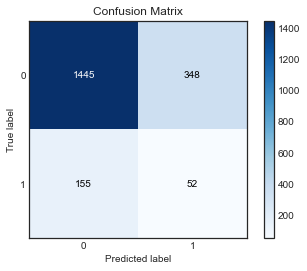

In [ ]:
# confusion metric

kn_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix on K-Neighbors:\n',kn_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


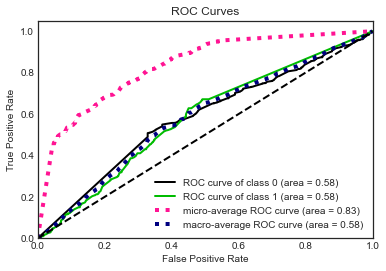

In [ ]:
# model performance check
kn_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_knn)
print(kn_ROC_AUC)

In [ ]:
# check model accuracy
kn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print("The accuracy score for K-Neighbors is:",kn_accuracy,'\n')

# check f1-score
kn_f1_score = metrics.f1_score(y_test,y_pred_knn)
print("The F1 score on K-Neighbors is:",kn_f1_score,'\n')

The accuracy score for K-Neighbors is: 0.7485 

The F1 score on K-Neighbors is: 0.171334431630972 



### Decision Tree

In [ ]:
# param
max_depth = [2, 3, 5, 10, 20]
min_samples_leaf= [5, 10, 20, 50, 100]
criterion= ["gini", "entropy"]

# define grid search
dtc_grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,criterion=criterion)
dtc_grid_search = GridSearchCV(estimator=clf3, param_grid=dtc_grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
dtc_grid_result = dtc_grid_search.fit(imputed_X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (dtc_grid_result.best_score_, dtc_grid_result.best_params_))
means = dtc_grid_result.cv_results_['mean_test_score']
stds = dtc_grid_result.cv_results_['std_test_score']
params = dtc_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.825911 using {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
0.649768 (0.010829) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.649768 (0.010829) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.649768 (0.010829) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.649768 (0.010829) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.649768 (0.010829) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.671204 (0.013868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.671204 (0.013868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.671204 (0.013868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.671204 (0.013868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.671204 (0.013868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.706060 (0.025674) with: {'criter

In [ ]:
# define new model for decision tree
dtc = DecisionTreeClassifier(random_state=42, criterion= 'entropy', max_depth= 20, min_samples_leaf= 5)
dtc = dtc.fit(imputed_X_train, y_train)

In [ ]:
# predict
y_pred_dtc = dtc.predict(imputed_X_test)
y_pred_proba_dtc = dtc.predict_proba(imputed_X_test)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_dtc, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.905838       0.140049      0.75     0.522944      0.826579
recall        0.804796       0.275362      0.75     0.540079      0.750000
f1-score      0.852333       0.185668      0.75     0.519000      0.783333
support    1793.000000     207.000000      0.75  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(dtc, imputed_X_train, y_train, cv=5)
print(np.sqrt(scores))

[0.86642886 0.9317332  0.9211707  0.92344426 0.92596389]


In [ ]:
# r2 score

dt = r2_score(y_test, dtc.predict(imputed_X_test))*100
print(dt,'%')

-169.43211792504934 %


Confusion Matrix on Decision Tree:
 AxesSubplot(0.125,0.125;0.62x0.755)


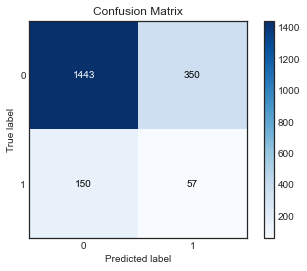

In [ ]:
# confusion metric

dt_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_dtc)
print('Confusion Matrix on Decision Tree:\n',dt_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


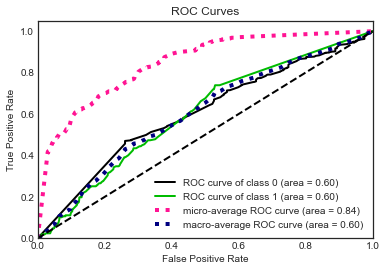

In [ ]:
# model performance check
dt_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_dtc)
print(dt_ROC_AUC)

In [ ]:
# check model accuracy
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dtc)
print("The accuracy score for Decision Tree is:",dt_accuracy,'\n')

# check f1-score
dt_f1_score = metrics.f1_score(y_test,y_pred_dtc)
print("The F1 score on Decision Tree is:",dt_f1_score,'\n')

The accuracy score for Decision Tree is: 0.75 

The F1 score on Decision Tree is: 0.18566775244299674 



### Random Forest

In [ ]:
# param
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)
rf_grid_search = GridSearchCV(estimator=clf4, param_grid=rf_grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
rf_grid_result = rf_grid_search.fit(imputed_X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.838306 using {'max_features': 'log2', 'n_estimators': 10}
0.831782 (0.025211) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.835697 (0.029306) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.834019 (0.027383) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.838306 (0.026710) with: {'max_features': 'log2', 'n_estimators': 10}
0.833460 (0.027241) with: {'max_features': 'log2', 'n_estimators': 100}
0.836349 (0.026050) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
# define new model for random forest
rf = RandomForestClassifier(random_state=42, max_features= 'log2', n_estimators= 10)
rf = rf.fit(imputed_X_train, y_train)

In [ ]:
# predict
y_pred_rf = rf.predict(imputed_X_test)
y_pred_proba_rf = rf.predict_proba(imputed_X_test)

# report result
modeling_report = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, target_names=['Deals','Did Not Deals'], output_dict=True))
print("Below is the report of Modeling results:","\n",modeling_report,'\n')

Below is the report of Modeling results: 
                  Deals  Did Not Deals  accuracy    macro avg  weighted avg
precision     0.906329       0.140476    0.7455     0.523403      0.827063
recall        0.798661       0.285024    0.7455     0.541843      0.745500
f1-score      0.849096       0.188198    0.7455     0.518647      0.780693
support    1793.000000     207.000000    0.7455  2000.000000   2000.000000 



In [ ]:
# cross validation
scores = cross_val_score(rf, imputed_X_train, y_train, cv=5)
print(np.sqrt(scores))

[0.8696498  0.92621548 0.92495686 0.92218186 0.926467  ]


In [ ]:
# r2 score

rfc = r2_score(y_test, rf.predict(imputed_X_test))*100
print(rfc,'%')

-174.28189604770026 %


Confusion Matrix on Random Forest:
 AxesSubplot(0.125,0.125;0.62x0.755)


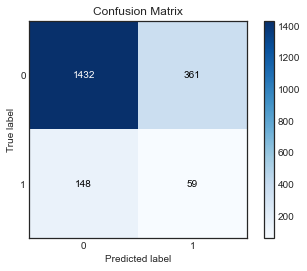

In [ ]:
# confusion metric

rfc_cm = skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix on Random Forest:\n',rfc_cm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


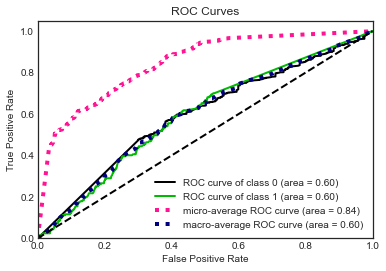

In [ ]:
# model performance check
rfc_ROC_AUC = skplt.metrics.plot_roc_curve(y_test, y_pred_proba_rf)
print(rfc_ROC_AUC)

In [ ]:
# check model accuracy
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("The accuracy score for Random Forest is:",rf_accuracy,'\n')

# check f1-score
rf_f1_score = metrics.f1_score(y_test,y_pred_rf)
print("The F1 score on Random Forest is:",rf_f1_score,'\n')

The accuracy score for Random Forest is: 0.7455 

The F1 score on Random Forest is: 0.18819776714513559 



## Modeling Comparison

Text(0.5, 1.0, 'Plotting the Model Accuracies Score')

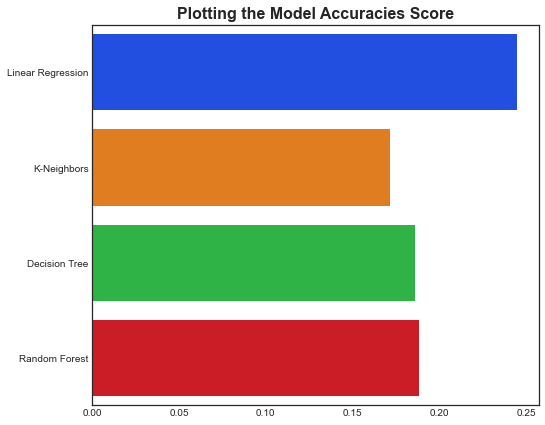

In [ ]:
plt.figure(figsize= (8,7))
ac = [lg_f1_score, kn_f1_score, dt_f1_score, rf_f1_score]
name = ['Linear Regression','K-Neighbors','Decision Tree','Random Forest']
sns.barplot(x = ac,y = name,palette='bright')
plt.title("Plotting the Model Accuracies Score", fontsize=16, fontweight="bold")

The best modeling for predict the deals and not deals seller is **Logistic Regression** rated by **F1 Score**, even the **Confusion Matrix** didn't goes well.